# Gradient Descent for Regression

## Purpose
To show the principle behind gradient descent by fitting a regression line through data.

## Idea
Reduce the overall mean squared error (MSE) between each datapoint and the regressor line with the formula:
$$MSE=\frac{1}{N}\sum_{i=1}^N(y_{actual} - (m_ix+b))^2$$

##### Limitations
- The gradients seem to explode with to fast a learning rate
- Complex data sets either take forever to solve, or diverge

## Data Preprocessing
We import pandas in order to create a clean representation of our data, and numpy for calculations.  We also import matplotlib in order to plot our results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We read in two correlated data streams.  One labeled `row`, and the other `col`.

In [2]:
data = pd.read_csv('test.csv')
data.head()

,row,col
0,1,2
1,2,1
2,3,4
3,4,3
4,5,6


Now let's plot our data in order to see if there is a good relationship.

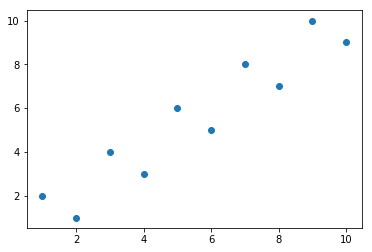

In [3]:
x = data['row'].values
y = data['col'].values

plt.scatter(x, y)
plt.show()

An easy task!  Now let's create a regressor class that utilizes MSE to calculate the best fit line.

## The Regressor Class

The regressor class contains five functions that do the following:
- `calculate_error` calculates the MSE for all datapoints.
- `gradient_descent` takes a step down the gradient
- `optimize_learningrate` changes learning rate in order to speed up convergence
- `regress` runs gradient descent until best fit is found
- `plot_results` plots the results

### Gradient Descent

In order to descend the gradient, we have to calculate the partial derivatives of both the slope $m$ and y-intercept $b$.  The following formulas compute these partial derivatives:
$$\frac{\partial}{\partial m}=\frac{2}{N}\sum_{i=1}^N-x_i(y_i-(mx_i+b))$$
$$\frac{\partial}{\partial b}=\frac{2}{N}\sum_{i=1}^N-(y_i-(mx_i+b))$$

In [4]:
class GradientRegressor():
    """
    Calculates the best fit line for a regression task by using gradient descent
    """

    def __init__(self, x, y, learning_rate=.01):
        self.x = x
        self.y = y
        self.N = len(x)  # getting the length of the dataset
        self.m = 0
        self.b = 0
        self.learning_rate = learning_rate
        self.learning_rate_list = []
        self.simple_speedchange_rate = 5  # hyperparameter tuned through trial and error
        self.m_avg_grad = []
        self.b_avg_grad = []
        self.training_step = 0
        self.epsilon = 1e-10  # stopping condition
        self.training = True


    def calculate_error(self):
        """
        Calculates the MSE on all datapoints
        """
        squared_error = (self.y - (self.m * self.x + self.b)) ** 2
        mse = np.mean(squared_error)
        return mse


    def gradient_descent(self):
        """
        Calculates the gradients for m and b and then changes m and b in relation to those gradients
        :return:
        """
        m_gradient = (2 / self.N) * np.sum(-self.x * (self.y - (self.m * self.x + self.b)))
        b_gradient = (2 / self.N) * np.sum(-(self.y - (self.m * self.x + self.b)))
        self.m_avg_grad.append(m_gradient)
        self.b_avg_grad.append(b_gradient)
        learning_rate = self.optimize_learningrate(m_gradient, b_gradient)
        self.m -= m_gradient * learning_rate
        self.b -= b_gradient * learning_rate


    def optimize_learningrate(self, m_grad, b_grad):
        """
        Increases learning rate if gradient is shallower than average;
        decreases learning rate if gradient is steeper than average
        :param m_grad:
        :param b_grad:
        :return learning_rate:
        """
        learning_rate = self.learning_rate
        if np.abs(m_grad) > np.abs(np.mean(self.m_avg_grad[-10:]) * 1.2) or np.abs(b_grad) > np.abs(
                        np.mean(self.b_avg_grad[-10:]) * 1.2):
            learning_rate *= 1 / self.simple_speedchange_rate
        elif np.abs(m_grad) < np.abs(np.mean(self.m_avg_grad[-10:]) * .8) or np.abs(b_grad) < np.abs(
                        np.mean(self.b_avg_grad[-10:]) * .8):
            learning_rate *= self.simple_speedchange_rate
        self.learning_rate_list.append(learning_rate)
        return learning_rate


    def regress(self):
        """
        Continually runs gradient descent until the mean of the previous MSEs
        are no different than epsilon from the current mean
        :return slope, intercept, mses, learning_rates:
        """
        mse_list = [100, 100]
        mse_list.append(self.calculate_error())
        while np.abs(mse_list[-1] - np.mean(mse_list[-3:])) > self.epsilon:
            self.gradient_descent()
            mse_list.append(self.calculate_error())
            self.training_step += 1
            self.plot_results()

        print("Training complete")
        print("Training steps",self.training_step)
        print("Error:", mse_list[-1])
        self.training = False
        return mse_list


    def plot_results(self, mses=None):
        """
        Plots the results in 3 plots--
        1. Best fit line through data
        2. MSE
        3. Learning rate
        :param mses:
        """
        if self.training == True:
            y_out = lambda points: self.m * points + self.b
            plt.plot(self.x, y_out(self.x), 'g', alpha=.1)
        else:
            y_out = lambda points: self.m * points + self.b
            plt.plot(self.x, y_out(self.x), 'r', alpha=1)
            plt.scatter(self.x, self.y)
            plt.title("Data ({} Training Steps)".format(self.training_step))
            plt.show()

            plt.figure(1)
            plt.subplot(211)
            plt.plot(np.arange(len(mses) - 3), mses[3:])
            plt.title("Mean Squared Error")
            plt.ylabel("MSE")

            plt.subplot(212)
            plt.plot(np.arange(len(self.learning_rate_list)), self.learning_rate_list)
            plt.title("Learning Rate")
            plt.ylabel("Rate")

            plt.tight_layout()
            plt.show()

## Testing Our Regressor
We create a `GradientDescent` object and train it.  It does pretty well!

In [5]:
reg = GradientRegressor(x,y)
mse = reg.regress()

Training complete
Training steps 1063
Error: 0.969696970237


## Plotting Our Results
Now that we have our results, we can plot it to see how well we did.  We will plot the MSE over time, learning rate over time, and the data with the best fit line through it.

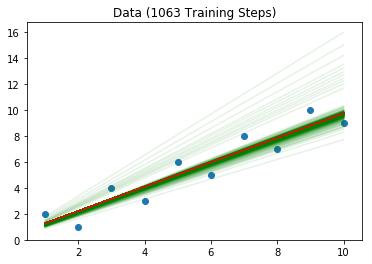

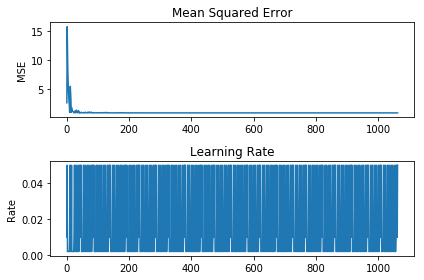

In [6]:
reg.plot_results(mse)